In [2]:
import matplotlib.pyplot as plt
import networkx as nx 
import numpy as np

import severability

# Multiscale severability applied to SBM

Graph with 100 nodes and 209 edges


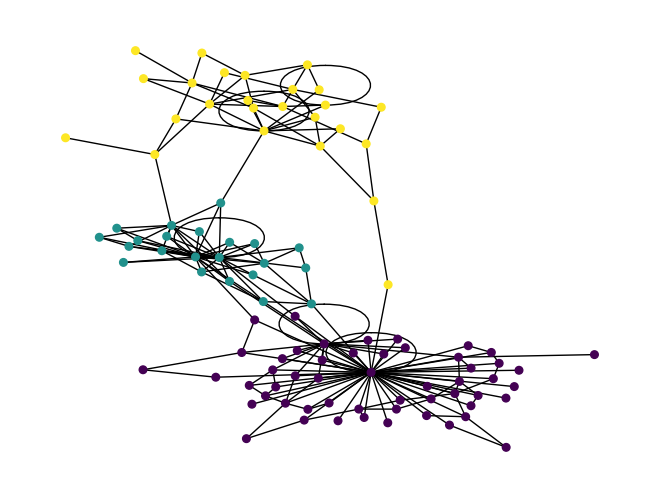

In [64]:
from networkx.generators.community import LFR_benchmark_graph

# create LFR benchmark graph
n = 100
tau1 = 2
tau2 = 1.5
mu = 0.06
G = LFR_benchmark_graph(
    n, tau1, tau2, mu, average_degree=5, min_community=20, seed=10
)

# get ground truth communities
communities = list({frozenset(G.nodes[v]["community"]) for v in G})
community_id = np.zeros(G.number_of_nodes())
for i in range(len(communities)):
    community_id[list(communities[i])] = i

# draw graph
print(G)
nx.draw(G, node_color=community_id, node_size=30, with_labels=False)

In [66]:
# get adjacency matrix
A = nx.to_numpy_array(G)

In [67]:
# run multiscale severability
max_t = 10
sev_results = severability.multiscale_severability(A, max_t, n_tries=30, n_workers=7)

Optimise severability ...


100%|██████████| 10/10 [17:40<00:00, 106.04s/it] 


Compute 1-Rand(t) ...


100%|██████████| 10/10 [00:54<00:00,  5.41s/it]


Compute 1-Rand(t,t') ...


/Users/work/miniconda3/envs/severability/lib/python3.11/site-packages/severability/optimal_scales.py:44: RuntimeWarning: Mean of empty slice
  return np.nanmean(A_w, axis=(2, 3))


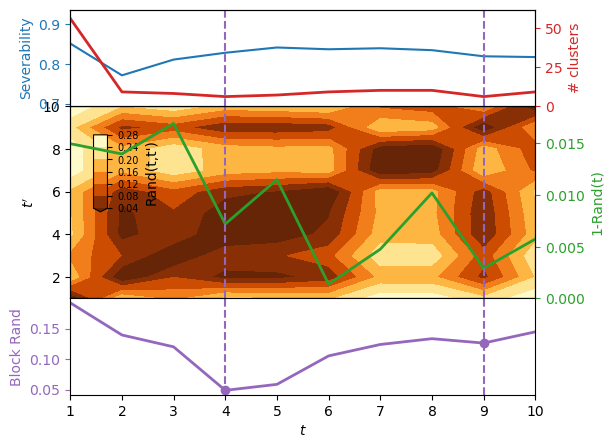

In [73]:
# plot severability results
sev_results = severability.identify_optimal_scales(sev_results, kernel_size=4)
severability.plotting.plot_scan(sev_results)

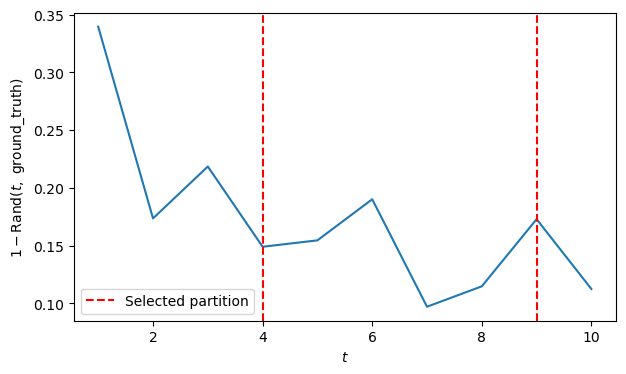

In [74]:
# store ground truth partition in severability format
ground_truth = [[(list(partition), 1) for partition in communities]]

# compute 1-Rand[ground_truth, severability(t)]
rand_ground_truth = severability.compute_rand_ttprime(ground_truth+sev_results["partitions"], n_nodes=G.number_of_nodes())[:,0][1:]

# plot 
fig, ax = plt.subplots(figsize=(7, 4))
ax.plot(np.arange(1,max_t+1), rand_ground_truth)
ax.axvline(x=sev_results["selected_partitions"][0]+1, ls = "--", c="red", label="Selected partition")
for i in range(1, len(sev_results["selected_partitions"])):
    ax.axvline(x=sev_results["selected_partitions"][i]+1, ls = "--", c="red")
ax.set(xlabel=r"$t$", ylabel="$1-\mathrm{Rand}(t,$ ground_truth$)$")
ax.legend();

Optimal scale: 6


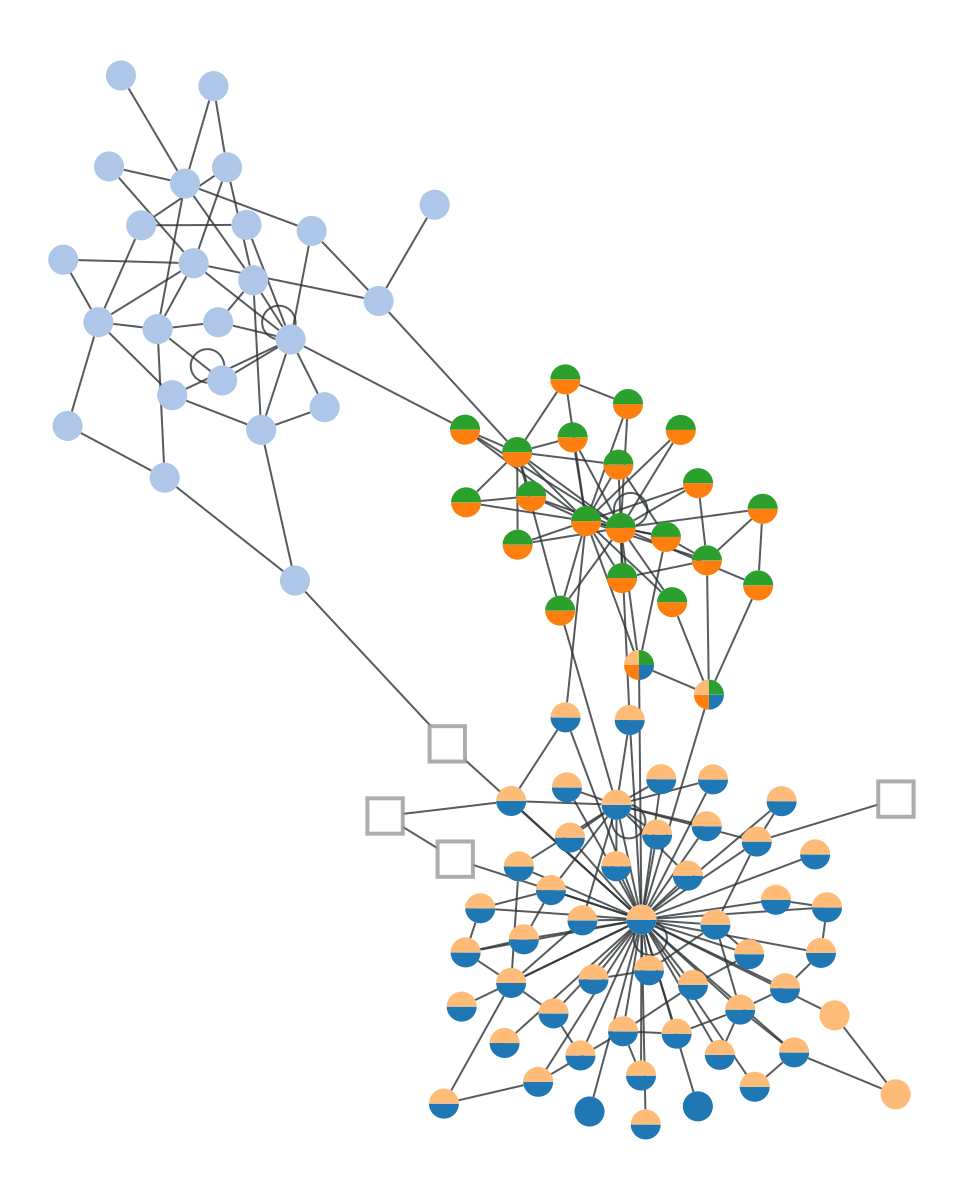

Optimal scale: 9


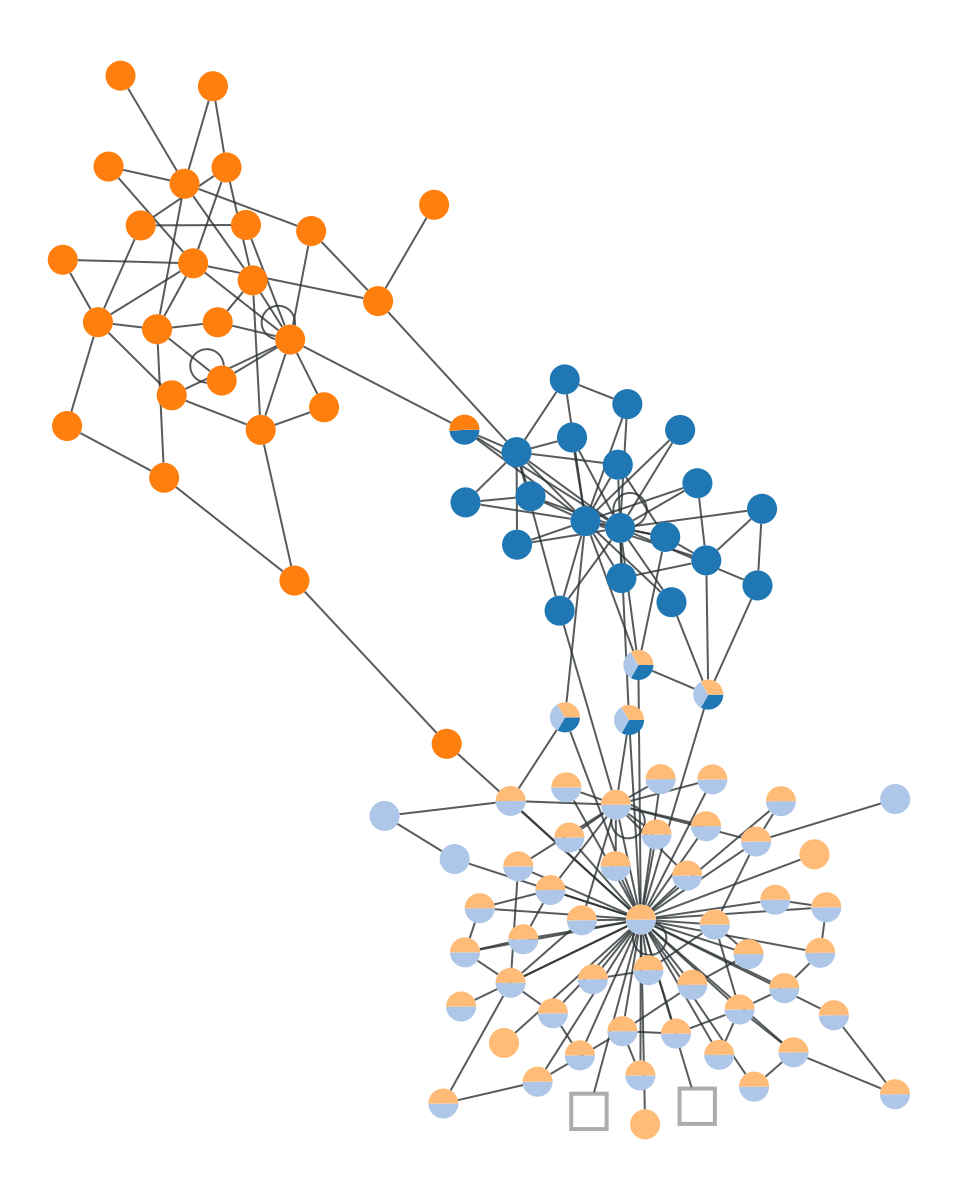

In [70]:
# create the pie chart graph visualisation
for i in sev_results["selected_partitions"]:
    print("Optimal scale:", sev_results["scales"][i])
    severability.plot_pie_graph(sev_results['partitions'][i], A)